In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/Device6/Documents/Research/bgoodlab/dNdS/dNdS_dynamics/')

from dNdS_analysis.utils import dynamics_utils, theory_utils
import dNdS_analysis.config as config

In [26]:
full_dnds_df = dynamics_utils.load_dNdS_data()

In [21]:
transfer_df = transfer_df.rename(columns={'Species name': 'species_name', 'Sample 1': 'sample 1', 'Sample 2': 'sample 2'})
transfer_df.set_index(['species_name', 'sample 1', 'sample 2'], inplace=True)

In [22]:
transfer_df

Clonal divergence  \
species_name                  sample 1  sample 2                       
Bacteroides_vulgatus_57955    700013715 700037042           0.000078   
                                        700037042           0.000078   
                                        700037042           0.000078   
                                        700037042           0.000078   
                                        700037042           0.000078   
...                                                              ...   
Akkermansia_muciniphila_55290 ERR912157 ERR912189           0.000108   
                                        ERR912189           0.000108   
                                        ERR912189           0.000108   
                                        ERR912189           0.000108   
                                        ERR912189           0.000108   

                                                   Clonal fraction  \
species_name                  sample 1  sample 2                     
Bacteroides_vulgatus_57955    700013715 700037042         0.695308   
                                        700037042         0.695308   
                                        700037042         0.695308   
                                        700037042         0.695308   
                                        700037042         0.695308   
...                                                            ...   
Akkermansia_muciniphila_55290 ERR912157 ERR912189         0.766120   
                                        ERR912189         0.766120   
                                        ERR912189         0.766120   
                                        ERR912189         0.766120   
                                        ERR912189         0.766120   

                                                  between clade?  \
species_name                  sample 1  sample 2                   
Bacteroides_vulgatus_57955    700013715 700037042              Y   
                                        700037042              N   
                                        700037042              Y   
                                        700037042              N   
                                        700037042              N   
...                                                          ...   
Akkermansia_muciniphila_55290 ERR912157 ERR912189           <NA>   
                                        ERR912189           <NA>   
                                        ERR912189           <NA>   
                                        ERR912189           <NA>   
                                        ERR912189           <NA>   

                                                   Shown in Fig3?  \
species_name                  sample 1  sample 2                    
Bacteroides_vulgatus_57955    700013715 700037042           False   
                                        700037042           False   
                                        700037042           False   
                                        700037042           False   
                                        700037042           False   
...                                                           ...   
Akkermansia_muciniphila_55290 ERR912157 ERR912189            True   
                                        ERR912189            True   
                                        ERR912189            True   
                                        ERR912189            True   
                                        ERR912189            True   

                                                   Transfer divergence (synonymous)  \
species_name                  sample 1  sample 2                                      
Bacteroides_vulgatus_57955    700013715 700037042                          0.107143   
                                        700037042                          0.004762   
                                        700037042                       

In [24]:
means = (
    transfer_df
    .groupby(level=['species_name', 'sample 1', 'sample 2'])[
        ['Clonal divergence', 'Clonal fraction']
    ]
    .mean()
)

In [38]:
result = full_dnds_df.join(means, how='right', rsuffix='_mean')  # rsuffix only matters if columns already exist

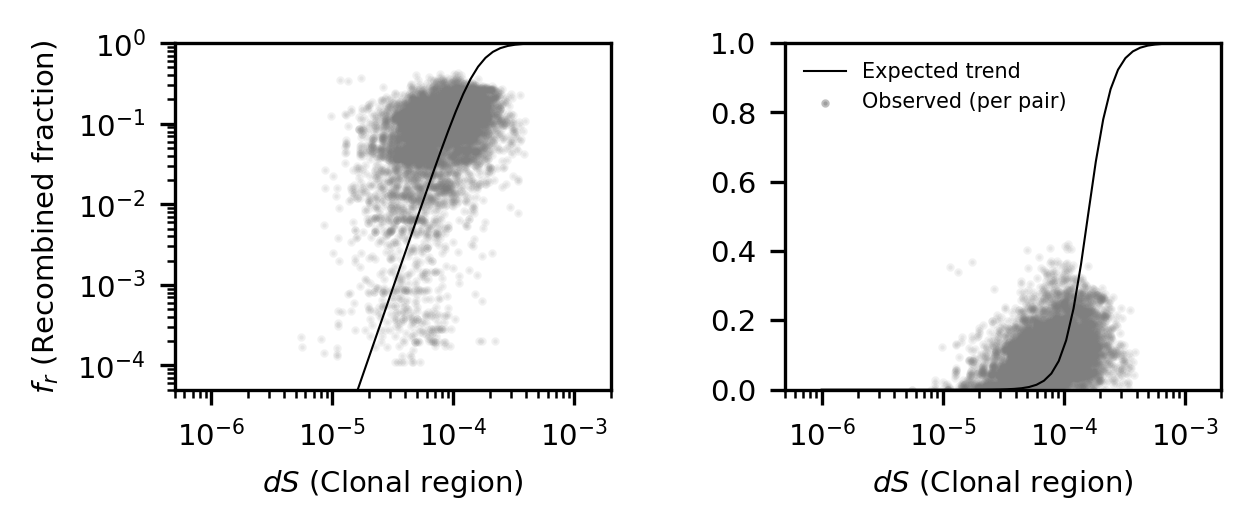

In [71]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 7

fig, axes = plt.subplots(1, 2, dpi=300, figsize=(4.5, 1.5), gridspec_kw={'width_ratios': [1, 1]})
plt.subplots_adjust(wspace=0.4)

theta = 3e-2
dNdS_c = 1
dNdS_r = 1e-1
ds_mid = 10**(-3.8)
k = 10
dsc_arr = np.logspace(-6, -3)
fr_arr = theory_utils.logistic_accumulation(dsc_arr, ds_mid, k=k)
dS_arr, dNdS_arr = theory_utils.compute_dNdS_rec_model(dsc_arr, fr_arr, theta, dNdS_c, dNdS_r)

axes[0].plot(dsc_arr, fr_arr, linestyle='-', color='k', linewidth=0.5)
# Add formatted parameters into the label
theory_label = (
    'Expected trend'
    # '(dS*=1.6e-4, k=10)'
)
axes[1].plot(
    dsc_arr, fr_arr,
    linestyle='-', color='k', linewidth=0.5,
    label=theory_label
)

emp_dsc = result['Clonal divergence']
emp_fr = 1 - result['Clonal fraction']
axes[0].scatter(emp_dsc, emp_fr, s=1, alpha=0.1, color="tab:grey", rasterized=True)
axes[1].scatter(emp_dsc, emp_fr, s=1, alpha=0.1, color="tab:grey", label=None, rasterized=True)
axes[1].scatter(-1, -1, s=1, alpha=0.5, color="tab:grey", label='Observed (per pair)')
# axes[1].scatter(big_df['core_div_4D'], big_df['core_div_1D'] / big_df['core_div_4D'], s=1, alpha=0.1, color='tab:grey', rasterized=True)

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[0].set_xlim([0.5e-6, 2e-3])
axes[0].set_ylim([0.5e-4, 1])
axes[1].set_xlim([0.5e-6, 2e-3])
axes[1].set_ylim([0, 1])

# axes[1].set_xlim([0.5e-6, 1e-1])
# axes[1].set_ylim([0.8e-1, 1.2e1])

axes[0].set_xlabel('$dS$ (Clonal region)')
axes[0].set_ylabel('$f_r$ (Recombined fraction)')
axes[1].set_xlabel('$dS$ (Clonal region)')
# axes[1].legend(
#     loc="center left",          # anchor relative to left edge of the bbox
#     bbox_to_anchor=(1.05, 0.5), # (x, y) in axes coordinates
#     frameon=True
# )
axes[1].legend(fontsize=5, frameon=False)
# axes[1].set_xlabel('$dS$ Full')
# axes[1].set_ylabel('$dN/dS$ Full')
fig.savefig(config.fig_path / 'recombination_dynamics_fit.pdf', bbox_inches='tight', dpi=600)